In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.max_columns', None)
three_df = pd.read_csv('ThreeSubjectheadings.csv')
one_df = pd.read_csv('OneSubjectHeading.csv')

In [ ]:
three_df.head()

,Item Loan Id,Loan Date,In House Loan Indicator,Barcode,Permanent Call Number,Circulation Library Code,Owning Library Code,Title (Complete),Author,Subjects,MMS Id,Subjects (Names)
0,2252958767220001701,1/2/2018,N,31951D01848189P,HT119 .S65 2000,TARCH,TARCH,Postmetropolis : critical studies of cities an...,"Soja, Edward W.",Cities and towns,9.913933e+15,NaN
1,2252958767220001701,1/2/2018,N,31951D01848189P,HT119 .S65 2000,TARCH,TARCH,Postmetropolis : critical studies of cities an...,"Soja, Edward W.",Metropolitan areas,9.913933e+15,NaN
2,2252958767220001701,1/2/2018,N,31951D01848189P,HT119 .S65 2000,TARCH,TARCH,Postmetropolis : critical studies of cities an...,"Soja, Edward W.",Urbanization,9.913933e+15,NaN
3,2252959196040001701,1/2/2018,N,31951000140967E,E159 .H77,TARCH,TARCH,Presence of the past ; a history of the preser...,"Hosmer, Charles Bridgham, 1932-",Monuments--Conservation and restoration--Unite...,9.930690e+15,NaN
4,2252959196040001701,1/2/2018,N,31951000140967E,E159 .H77,TARCH,TARCH,Presence of the past ; a history of the preser...,"Hosmer, Charles Bridgham, 1932-",Historic buildings--United States,9.930690e+15,NaN


In [ ]:
three_df['Loan Date'] = three_df['Loan Date'].astype(str).str[-4:]
one_df['Loan Date'] = one_df['Loan Date'].astype(str).str[-4:]
three_df.head(5)

In [13]:
# Create a mask to subset data by year
def Mask(year, df):
    mask_year = df[(df.Date == year)]
    #mask_year.to_csv('FirstThree' + 'AlmaData' + str(year) +'.csv', index=False )
    # print(mask_year)
    return(mask_year)

In [ ]:
for i in range(2018,2024):
    files = Mask(str(i), three_df)
    uniques = (i, len(files['Subjects'].unique()))
    print(uniques)


(2018, 6456)
(2019, 6085)
(2020, 3065)
(2021, 3090)
(2022, 3555)
(2023, 3505)


In [17]:
three_df_counts = three_df['Date'].value_counts().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
allcheckouts = three_df_counts['Counts'].sum()
three_df_counts['Total Counts %'] = three_df_counts['Counts'] / allcheckouts
three_df_counts

,Date,Counts,Total Counts %
0,2018,14397,0.282427
1,2019,13488,0.264595
2,2022,6526,0.128021
3,2023,6411,0.125765
4,2021,5200,0.102009
5,2020,4954,0.097183


In [20]:
three_subject_counts = three_df['Subjects'].value_counts()
three_subject_counts.head(25)

Subjects
Architecture--Periodicals                                1061
Architecture, Modern--20th century                        789
Architecture--Spain--Periodicals.                         569
Architecture--Espagne--20e siècle--Périodiques.         566
Architecture                                              435
Architecture, Modern--21st century                        403
City planning                                             374
Architectural design                                      302
Architecture and society                                  276
Architecture--Philosophy                                  267
Landscape architecture                                    246
Architecture--Environmental aspects                       229
Sustainable architecture                                  208
Architecture--Human factors                               208
Building--Periodicals                                     206
Architecture--United States--History--20th century        189

In [27]:
one_subject_counts = one_df['Subjects'].value_counts()
one_subject_counts.head(25)

Subjects
Architecture--Spain--Periodicals.                          569
Architecture--Periodicals                                  432
Architecture, Modern--20th century                         253
City planning                                              177
Architecture                                               136
Architecture and society                                   128
Architectural design                                       125
Architecture--Philosophy                                   120
Architecture--Environmental aspects                        119
Landscape architecture                                     114
Andō, Tadao,--1941-                                        110
Architecture, Domestic--Designs and plans                  101
Building, Wooden                                            78
Architecture--Human factors                                 77
Sustainable architecture                                    73
City planning--United States                  

<Axes: ylabel='Subjects'>

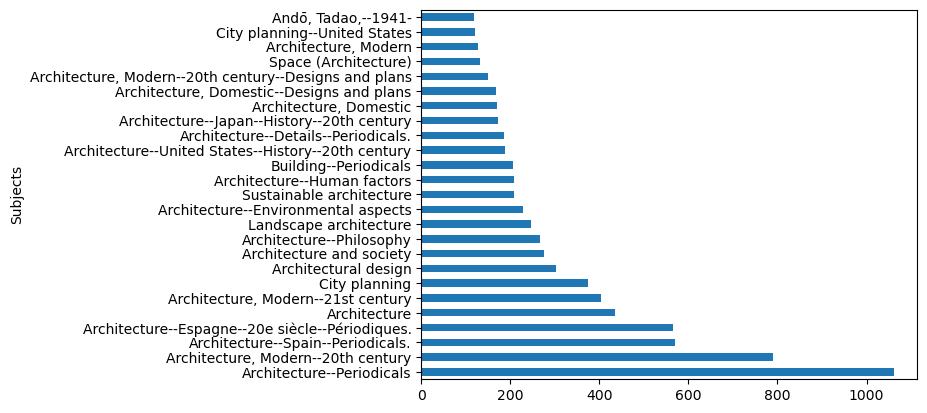

In [ ]:
# Create a bar plot of top 25 subject headings for the first three subjects DataFrame

three_subject_counts.head(25).plot.barh()

<Axes: ylabel='Subjects'>

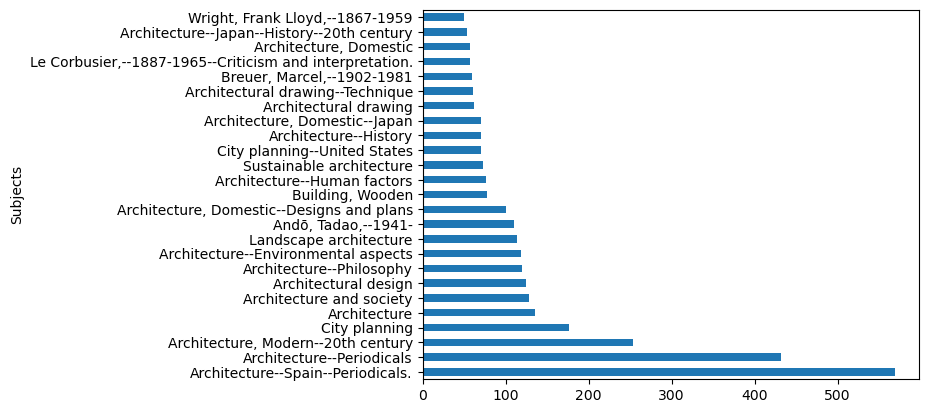

In [29]:
# Create a bar plot of top 25 subject headings for the first subject DataFrame

one_subject_counts.head(25).plot.barh()

In [30]:
# Create DataFrames from Series
df1 = pd.DataFrame(three_subject_counts).reset_index()
df2 = pd.DataFrame(one_subject_counts).reset_index()

# Merge SeriDataFrames into one DataFrame
bar_df = pd.merge(df1, df2, how='left', on='Subjects')
bar_df = bar_df.rename(columns={'count_x': 'Three Subjects', 'count_y': 'First Subjects'})
bar_df.head(25)

,Subjects,Three Subjects,First Subjects
0,Architecture--Periodicals,1061,432.0
1,"Architecture, Modern--20th century",789,253.0
2,Architecture--Spain--Periodicals.,569,569.0
3,Architecture--Espagne--20e siècle--Périodiques.,566,NaN
4,Architecture,435,136.0
5,"Architecture, Modern--21st century",403,50.0
6,City planning,374,177.0
7,Architectural design,302,125.0
8,Architecture and society,276,128.0
9,Architecture--Philosophy,267,120.0


<Axes: ylabel='Subjects'>

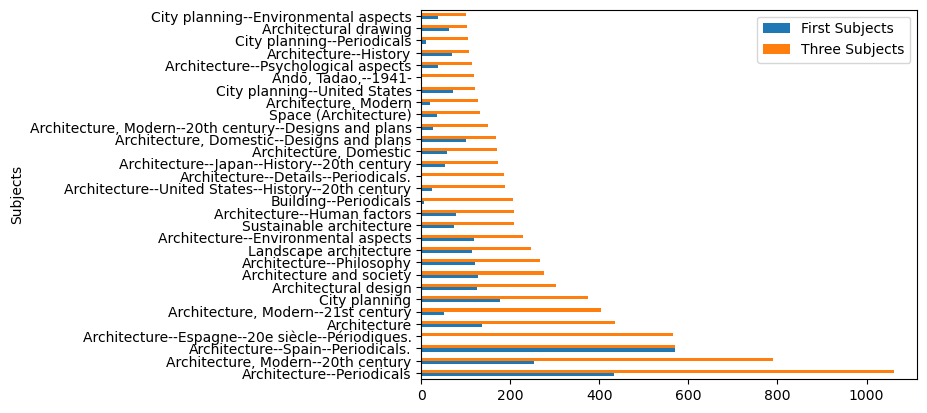

In [31]:
# Create double bar graph of both different subject headings

bar_df = bar_df.head(30)
bar_df.plot(x='Subjects', y=['First Subjects', 'Three Subjects'], kind='barh')